In [2]:
import os
import pandas as pd

df = pd.read_csv('./supermarket_sales - Sheet1.csv')
df_copy = df.copy()

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

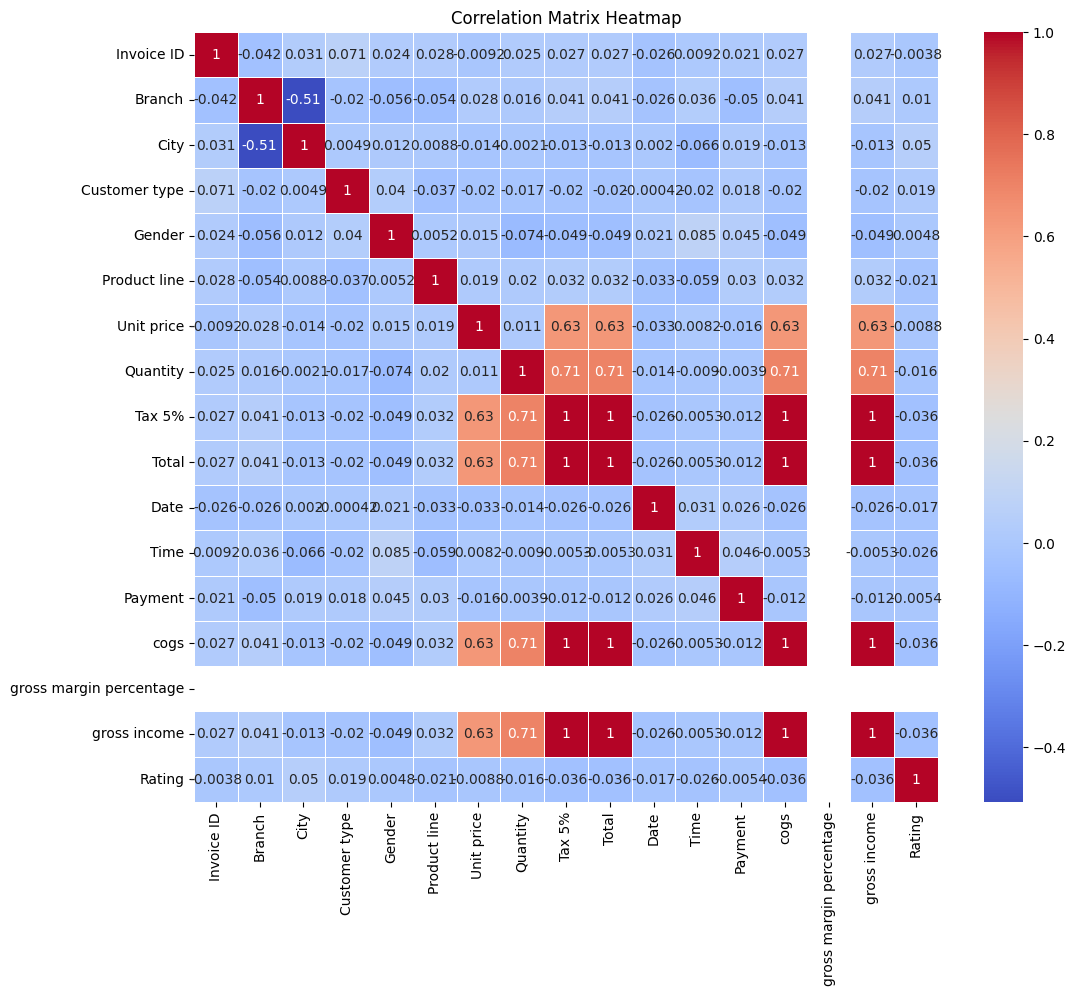

In [8]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
print(label_encoders)

{'Invoice ID': LabelEncoder(), 'Branch': LabelEncoder(), 'City': LabelEncoder(), 'Customer type': LabelEncoder(), 'Gender': LabelEncoder(), 'Product line': LabelEncoder(), 'Date': LabelEncoder(), 'Time': LabelEncoder(), 'Payment': LabelEncoder()}


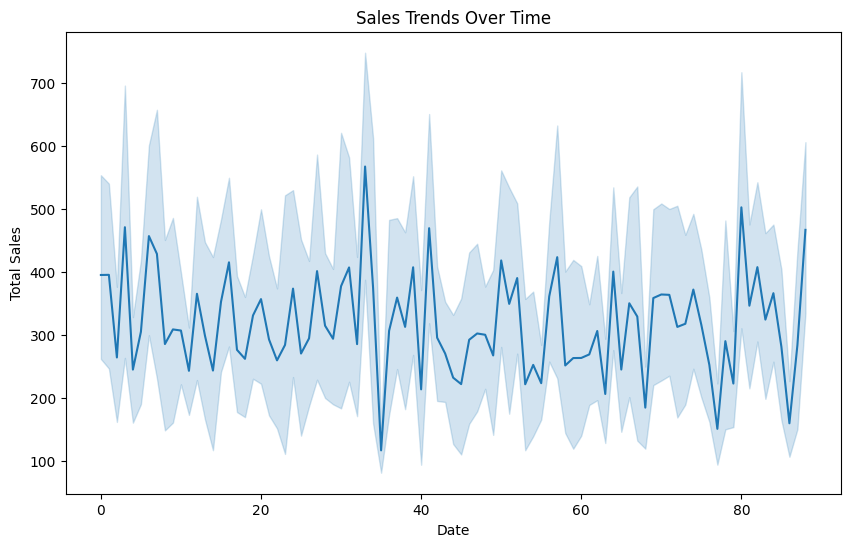

In [10]:
# Plotting Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total', data=df)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

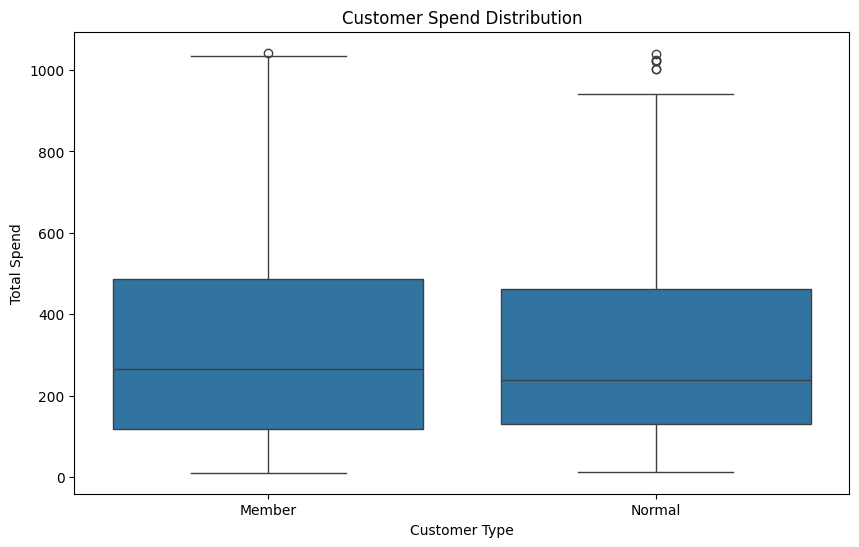

In [11]:
customer_type_mapping = {0: 'Member', 1: 'Normal'}
df['Customer type'] = df['Customer type'].map(customer_type_mapping)

# Plotting Sales Trends
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer type', y='Total', data=df)
plt.title('Customer Spend Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Total Spend')
plt.show()

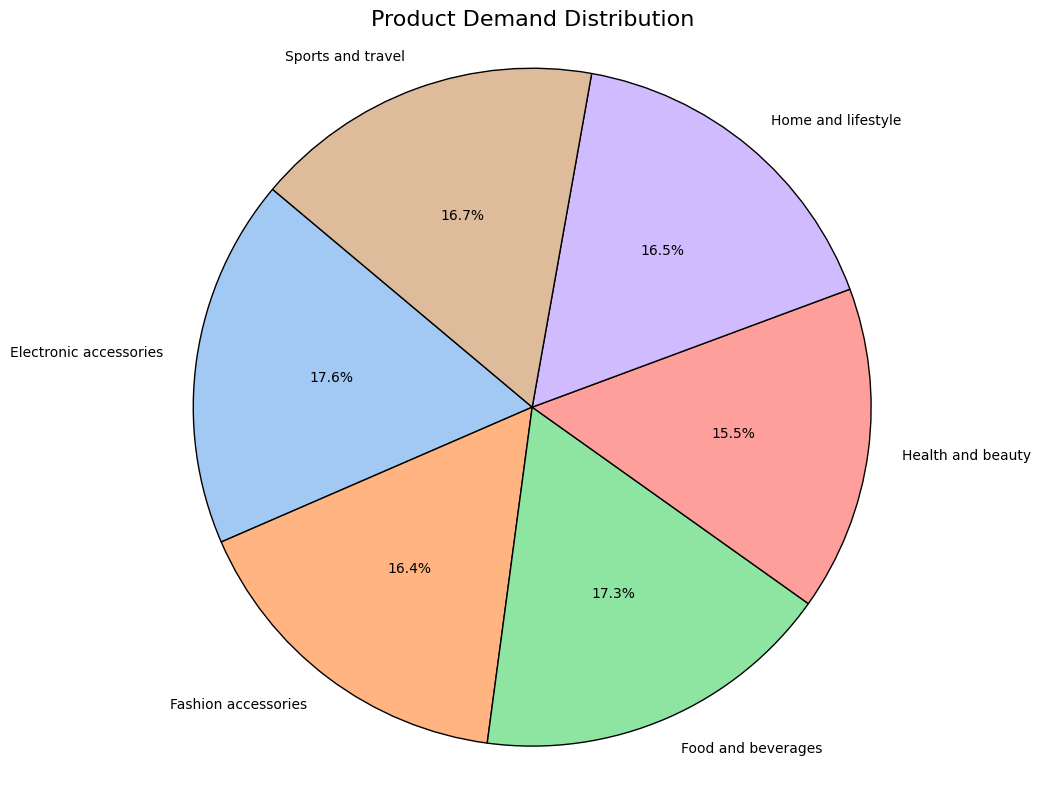

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_copy['Product line'] = label_encoder.fit_transform(df_copy['Product line'])

# Plotting Product Demand as a Pie Chart with Improved Styling
plt.figure(figsize=(10, 8))
product_demand = df_copy.groupby('Product line')['Quantity'].sum().reset_index()

# Mapping numeric labels back to categorical values for plotting
product_demand['Product line'] = label_encoder.inverse_transform(product_demand['Product line'])

colors = sns.color_palette('pastel')[0:len(product_demand)]
plt.pie(product_demand['Quantity'], labels=product_demand['Product line'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Product Demand Distribution', fontsize=16)
plt.axis('equal')  
plt.tight_layout()  
plt.show()
plt.show()

In [13]:
# Initialize label encoders for all categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [14]:
# Select features and target variables for each prediction task
sales_features = ['Date', 'Time', 'Unit price', 'Quantity']
customer_spend_features = ['Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity']
product_demand_features = ['Product line', 'Unit price', 'Quantity', 'Date', 'Time']

sales_target = 'Total'
customer_spend_target = 'Total'
product_demand_target = 'Quantity'

In [15]:
from sklearn.model_selection import train_test_split

X_sales = df[sales_features]
y_sales = df[sales_target]

X_customer_spend = df[customer_spend_features]
y_customer_spend = df[customer_spend_target]

X_product_demand = df[product_demand_features]
y_product_demand = df[product_demand_target]

In [16]:
# Train-test split for each task
X_sales_train, X_sales_test, y_sales_train, y_sales_test = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)
X_customer_spend_train, X_customer_spend_test, y_customer_spend_train, y_customer_spend_test = train_test_split(X_customer_spend, y_customer_spend, test_size=0.2, random_state=42)
X_product_demand_train, X_product_demand_test, y_product_demand_train, y_product_demand_test = train_test_split(X_product_demand, y_product_demand, test_size=0.2, random_state=42)

In [17]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Sales Forecasting Model
sales_model = LinearRegression()
sales_model.fit(X_sales_train, y_sales_train)

# Customer Spend Prediction Model
customer_spend_model = RandomForestRegressor()
customer_spend_model.fit(X_customer_spend_train, y_customer_spend_train)

# Product Demand Prediction Model
product_demand_model = DecisionTreeRegressor()
product_demand_model.fit(X_product_demand_train, y_product_demand_train)

DecisionTreeRegressor()

In [18]:
import heapq

# Function to get top N products by sales
def get_top_n_products_by_sales(df, n):
    product_sales = df.groupby('Product line')['Total'].sum()
    top_n_indices = heapq.nlargest(n, range(len(product_sales)), key=lambda x: product_sales.iloc[x])
    top_n_products = [(product_sales.index[idx], product_sales.iloc[idx]) for idx in top_n_indices]
    return top_n_products

# Example usage
top_products = get_top_n_products_by_sales(df, 5)
print("Top 3 products by sales:", top_products)

Top 3 products by sales: [(2, 56144.844), (5, 55122.8265), (0, 54337.5315), (1, 54305.895), (4, 53861.913)]


In [19]:
print(product_demand['Product line'])

0    Electronic accessories
1       Fashion accessories
2        Food and beverages
3         Health and beauty
4        Home and lifestyle
5         Sports and travel
Name: Product line, dtype: object


In [20]:
sales_data = top_products

label_mapping = {
    0: 'Electronic accessories',
    1: 'Fashion accessories',
    2: 'Food and beverages',
    3: 'Health and beauty',
    4: 'Home and lifestyle',
    5: 'Sports and travel'
}

In [21]:
labels_mapped = [label_mapping[label] for label, _ in sales_data]

# Extracting sales values from sales data
sales_values = [sales_value for _, sales_value in sales_data]

# Sorting data for line plot in ascending order of sales
sorted_indices = sorted(range(len(sales_values)), key=lambda k: sales_values[k])
sorted_labels = [labels_mapped[i] for i in sorted_indices]
sorted_sales = [sales_values[i] for i in sorted_indices]

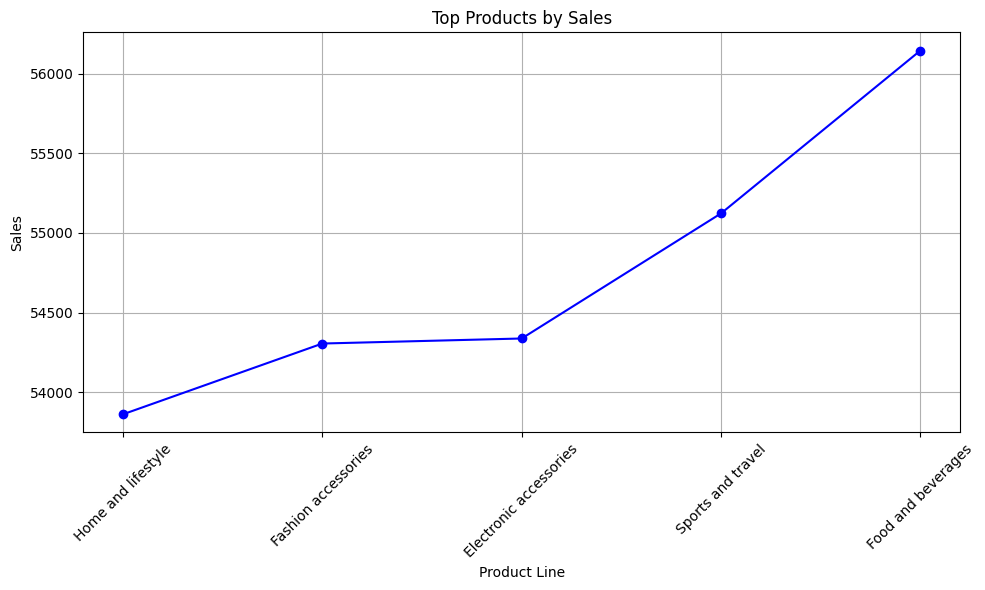

In [22]:
# Plotting as a line graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_labels, sorted_sales, marker='o', linestyle='-', color='b')
plt.title('Top Products by Sales')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()